<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_2_catdist.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 473 — Categorical Distribution

### IMPORTANT: The assignment portion is in part 6

---

## Learning Goals
- Understand the concept of categorical distribution  
- Understand how to use One-Hot Encoding to sort categorical data  
- Understand how to use multinomial distribution to model categorical data  



## 1. Introduction to Categorical Distribution

The **categorical distribution** describes the probability of a random variable that can take on one of *k* possible categories, with each having its own probability.

- Example: Rolling a 3-sided die (with outcomes `{A, B, C}`).
- Each category has a probability:  
  $P(X = i) = p_i, \quad \text{where } \sum_{i=1}^k p_i = 1$

We often represent the outcome using **One-Hot encoding**.


## 2. One-Hot Encoding

Categorical data is often encoded numerically for machine learning.  
**One-Hot Encoding** represents each category as a binary vector with a `1` in the position of the chosen category.

Example:  
- Categories: `["A", "B", "C"]`  
- Sample outcome: `"B"`  
- One-Hot: `[0, 1, 0]`


In [ ]:
# Example: One-hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example categorical samples
samples = ["A", "B", "C", "A", "B", "C", "A"]

# Reshape to column vector for encoder
X = np.array(samples).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## 3. Multinomial Distribution

The **multinomial distribution** extends the categorical distribution to multiple trials.  
- Instead of one outcome, we have `n` trials.  
- The probability of each outcome depends on the categorical probabilities.  

Example: Tossing a 3-sided die 20 times.


In [ ]:
# Example: Multinomial distribution with numpy

# Define probability distribution over 3 categories
probs = [0.2, 0.5, 0.3]  # must sum to 1
n_trials = 20
multinomial_sample = np.random.multinomial(n_trials, probs)
multinomial_sample


array([ 5,  5, 10])

## 4. Visualization of Categorical vs Multinomial Distribution
We can visualize:

1. **Categorical Distribution Simulation** — outcomes from repeated categorical trials.
2. **Multinomial Distribution** — outcome counts over multiple trials.

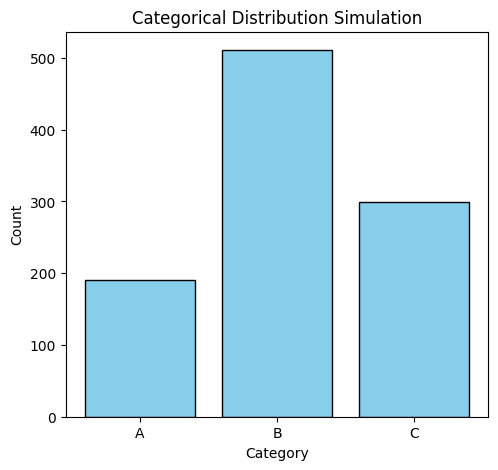

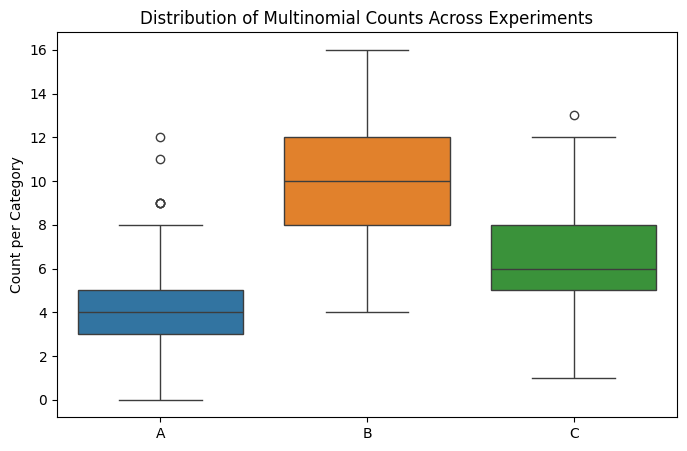

In [ ]:
import matplotlib.pyplot as plt

# Define categories and probabilities
categories = ["A", "B", "C"]
probs = [0.2, 0.5, 0.3]

# Parameters
n_trials = 1000
results = np.random.choice(categories, size=n_trials, p=probs)

# Count frequencies (Categorical simulation)
counts = [np.sum(results == c) for c in categories]

# Plot categorical simulation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(categories, counts, color="skyblue", edgecolor="black")
plt.title("Categorical Distribution Simulation")
plt.xlabel("Category")
plt.ylabel("Count")

import seaborn as sns

# Run many multinomial experiments
n_experiments = 500
n_per_experiment = 20
multi_samples = np.random.multinomial(n_per_experiment, probs, size=n_experiments)

# Convert to DataFrame for plotting
import pandas as pd
df = pd.DataFrame(multi_samples, columns=categories)

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("Distribution of Multinomial Counts Across Experiments")
plt.ylabel("Count per Category")
plt.show()



## 5. Summary

- **Categorical Distribution** models a single trial with multiple categories.  
- **One-Hot Encoding** represents categories numerically.  
- **Multinomial Distribution** generalizes the categorical distribution to multiple trials.  

These concepts are fundamental in probability, statistics, and machine learning when handling categorical data.


# 6. Exercises
### Exercise 1
Create a categorical distribution with 4 categories of your choice and assign probabilities.  
- Sample 20 outcomes.  
- Print the frequency of each category.  

In [17]:
# Your code here
categories = ['CRICKET', 'BASEBALL', 'PICKLEBALL', 'TENNIS']
probabilities = [0.4, 0.1, 0.3, 0.2]
samples = np.random.choice(categories, size=20, p=probabilities)
frequency = {category: np.sum(samples == category) for category in categories}
print(frequency)

{'CRICKET': np.int64(7), 'BASEBALL': np.int64(2), 'PICKLEBALL': np.int64(7), 'TENNIS': np.int64(4)}


### Exercise 2
Using your sampled outcomes from Exercise 1, perform One-Hot Encoding.  
- Show the first 5 encoded vectors.  


In [19]:
# Your code here
X = np.array(samples).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded[:5]


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

### Exercise 3
Run 100 experiments of 10 trials each using the multinomial distribution.  
- Record the counts.  
- Compare the average counts to the theoretical probabilities.  


In [20]:
# Your code here


### Exercise 4
Plot a histogram showing the distribution of counts for one category (e.g., "B") across multiple multinomial experiments.  
- What shape does the histogram resemble?  
- Why do you think that is?  


In [ ]:
# Your code here

Enter response here

### Exercise 5
Answer in text (2–3 sentences each):

1. How does the categorical distribution differ from the multinomial distribution?  
2. Why is One-Hot encoding important for machine learning models?  
3. If you increased the number of trials in the multinomial distribution, what would happen to the observed frequencies? Why?


Enter response here